In [1]:
import pandas as pd

file_path = '90minFootballTransferNewsNLP.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
df




,Title,Date,Link,Content
0,Football transfer rumours: Why Maguire's Man U...,"Aug 15, 2023",https://www.90min.com/posts/football-transfer-...,"90minÂ rounds up the latestÂ transfer news, ru..."
1,Chelsea agree Romeo Lavia fee with Southampton,"Aug 15, 2023",https://www.90min.com/posts/chelsea-agree-rome...,Chelsea have finalised an agreement with South...
2,Harry Maguire's proposed West Ham transfer col...,"Aug 15, 2023",https://www.90min.com/posts/harry-maguire-prop...,Harry Maguire's proposed transfer to West Ham ...
3,Southampton director breaks down Chelsea & Liv...,"Aug 15, 2023",https://www.90min.com/posts/southampton-direct...,Southampton director Jason Wilcox has revealed...
4,Neymar completes move from PSG to Al Hilal,"Aug 15, 2023",https://www.90min.com/posts/neymar-completes-m...,Saudi Pro League side Al Hilal have confirmed ...
...,...,...,...,...
6721,Bayern Munich's Honorary President Talks Up Le...,"Jun 1, 2020",https://www.90min.com/posts/bayern-munich-s-ho...,Bayern Munich honorary president Uli Hoeness h...
6722,RB Leipzig Boss Julian Nagelsmann Admits 'Noth...,"Jun 1, 2020",https://www.90min.com/posts/rb-leipzig-boss-ju...,RB Leipzig manager Julian Nagelsmann has admit...
6723,Manchester United 'Leading Kai Havertz Race' A...,"Jun 1, 2020",https://www.90min.com/posts/manchester-united-...,"So, you know how clubs don't have loads of mon..."
6724,Inter & Roma Close to Confirming Loan Extensio...,"Jun 1, 2020",https://www.90min.com/posts/inter-roma-close-t...,Manchester United's Alexis SÃ¡nchez and Chris ...


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

file_path = '90minFootballTransferNewsNLP.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Content'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get similar articles
def get_similar_articles(query, cosine_sim_matrix, top_n=10):
    # Check if the query exists in the DataFrame
    if query not in df['Title'].values:
        print(f"Query '{query}' not found in the dataset.")
        return []

    query_index = df[df['Title'] == query].index[0]
    sim_scores = list(enumerate(cosine_sim_matrix[query_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    similar_articles = sim_scores[1:top_n+1]  # Exclude the query article itself
    return similar_articles

# Queries
queries = [
    "Chelsea agree Romeo Lavia fee with Southampton",
    "Harry Maguire's proposed West Ham transfer",
    "Neymar completes move from PSG to Al Hilal"
]

# Output
for query in queries:
    similar_articles = get_similar_articles(query, cosine_sim)
    print(f"\nTop 10 articles similar to '{query}':")
    if not similar_articles:
        print("NO SIMILAR ARTICLE")
    else:
        for article_id, score in similar_articles:
            print(f"Article ID: {article_id}, Similarity Score: {score:.2f}, Title: {df.at[article_id, 'Title']}")



Top 10 articles similar to 'Chelsea agree Romeo Lavia fee with Southampton':
Article ID: 758, Similarity Score: 0.41, Title: Arsenal in talks with Southampton over midfielder Romeo Lavia
Article ID: 3, Similarity Score: 0.39, Title: Southampton director breaks down Chelsea & Liverpool's battle for Romeo Lavia
Article ID: 48, Similarity Score: 0.39, Title: Chelsea closing in on Â£55m agreement to sign Romeo Lavia
Article ID: 6, Similarity Score: 0.38, Title: Chelsea closing in on Michael Olise signing
Article ID: 79, Similarity Score: 0.38, Title: Chelsea launch bid for Liverpool target Romeo Lavia
Article ID: 74, Similarity Score: 0.36, Title: Liverpool make approach to rival Chelsea for Brighton's Moises Caicedo
Article ID: 493, Similarity Score: 0.35, Title: Liverpool, Arsenal & Chelsea shaping up for transfer battle over Southampton star
Article ID: 30, Similarity Score: 0.35, Title: Chelsea agree British record deal with Brighton for Moises Caicedo
Article ID: 19, Similarity Score

Query 'Harry Maguire's proposed West Ham transfer' not found in the dataset.


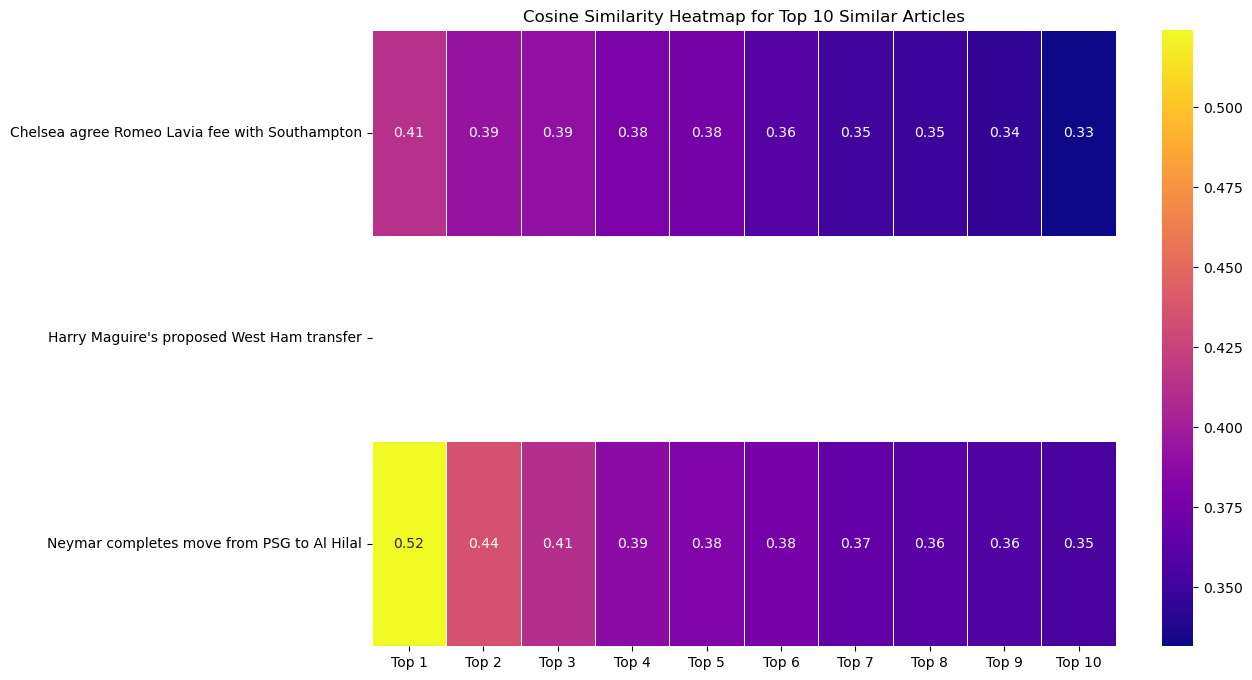

In [8]:
# Create a matrix for the top 10 similar articles
matrix = []
for query in queries:
    similar_articles = get_similar_articles(query, cosine_sim)
    matrix.append([score for _, score in similar_articles])

# Convert the matrix to a DataFrame
matrix_df = pd.DataFrame(matrix, index=queries, columns=[f"Top {i+1}" for i in range(10)])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_df, cmap='plasma', annot=True, fmt=".2f", linewidths=.5)
plt.title('Cosine Similarity Heatmap for Top 10 Similar Articles')
plt.show()